### Статистика

        для описания некоторой величины используются два основных типа характеристик: характеристики положения и характеристики разброса. 

#### Мода - характеристика положения

Мода - это значение, которое величина принимает наиболее часто

In [1]:
import pandas as pd

a = pd.Series([1, 4, 1, 6, 7, 1])
mode = a.mode()[0]
print(f'Мода набора данных равна {mode}')

Мода набора данных равна 1


In [2]:
a.mode()    # возвращает серию 

0    1
dtype: int64

Мода  отлично описывает дискретные переменные, но не всегда достаточно хорошо характеризует непрерывные величины. 

пусть набор данных описывает время (в минутах), которое пользователь провёл на сайте: 
2.3, 2.1, 2.4, 2.5, 2. В этом случае мода — каждое значение, так как все они встречаются по одному разу. Поэтому для непрерывных величин чаще, чем мода, используется другая характеристика — **медиана**.

При этом медиана не всегда точно описывает центральную тенденцию

<AxesSubplot: >

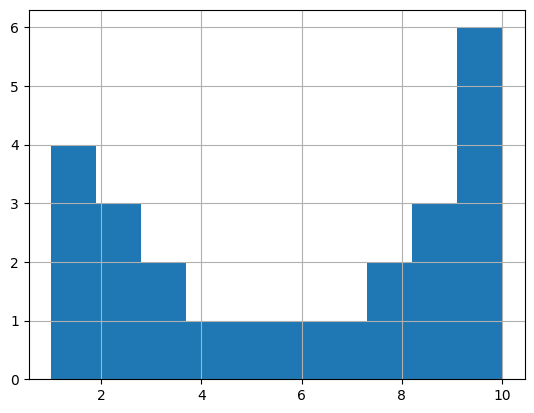

In [3]:
import pandas as pd

data = pd.Series([1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 5, 6, 7, 8, 8, 9, 9, 9, 10, 10, 10, 10, 10, 10])
data.hist()

In [4]:
import pandas as pd

data = pd.Series([1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 5, 6, 7, 8, 8, 9, 9, 9, 10, 10, 10, 10, 10, 10])
print('Мода набора данных равна', data.mode()[0])
print('Медиана исходного набора данных равна', data.median())
print('Среднее арифметическое набора данных равно', data.mean())

Мода набора данных равна 10
Медиана исходного набора данных равна 6.5
Среднее арифметическое набора данных равно 5.875


        в этом случае центр лучше показало среднее арифметическое, медиана же показала себя менее точно. Исходя из этого, можно сделать вывод, что в случае отсутствия заметных выбросов на гистограмме, наиболее высокой точностью обладает среднее арифметическое. Мода используется для демонстрации «вершины» гистограммы, а не центральной тенденции.

#### Дисперсия

По сути это сумма квадратов отклонений каждого элемента от среднего арифметического, деленного на число элементов

In [5]:
import pandas as pd

data = pd.Series([1, 2, 3, 4, 5, 6])

mean = data.mean()
var = 0
for i in data:
	var += (i - mean) * (i - mean)
var /= len(data)

print(var)

2.9166666666666665


#### Стандартное отклонение

это всего лишь величина, отражающие отклонение в тех же единицах измерения - поэтому корень из дисперсии

In [6]:
import pandas as pd

data = pd.Series([1, 2, 3, 4, 5, 6])

mean = data.mean()
var = 0
for i in data:
    var += (i - mean) * (i - mean)
var /= len(data)
std = var**0.5 # извлекаем корень

print(std)

1.707825127659933


#### Квартили и процентили

Размах набора данных — это разница между максимальным и минимальным значениями набора данных.

In [7]:
import pandas as pd

x = pd.Series([1, 2, 3, 4, 5, 6, 7, 8]) # набор данных

range_value = x.max() - x.min() # размах
print(range_value)

7



Размах — это, конечно, хорошо, но у него есть существенный недостаток: большая чувствительность к выбросам. Если бы набор данных, который мы рассматриваем как пример, выглядел как 

3, 1, 2, 5, 1000, то размах этого набора данных был бы 

1000−1=999, что недостаточно хорошо характеризует полученный набор. Поэтому, чтобы точнее описать разброс данных, существует другая структурная характеристика — **межквартильный размах.**

Межквартильный размах — это размах половины значений набора данных, которые находятся вокруг медианы. Это ближайшие к медиане значения: 
25 % меньше неё и 25 % больше.

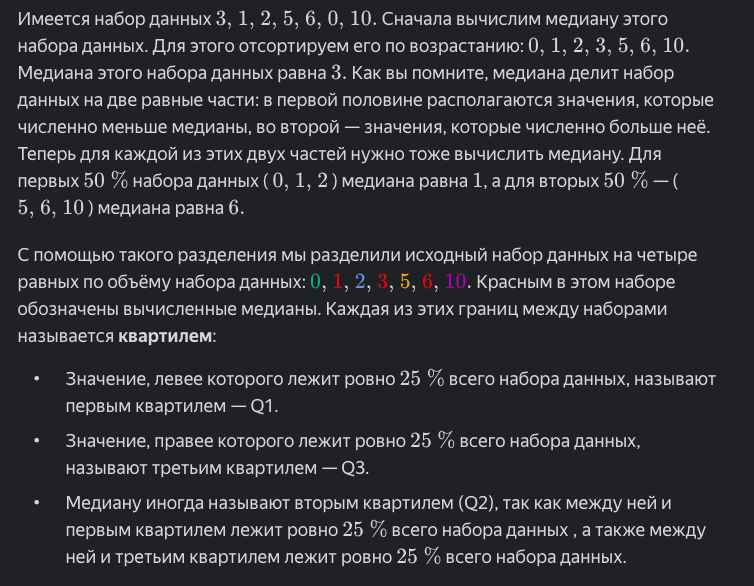

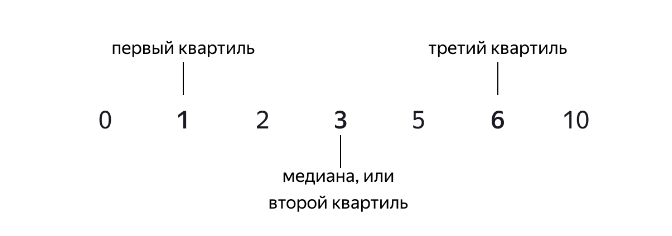

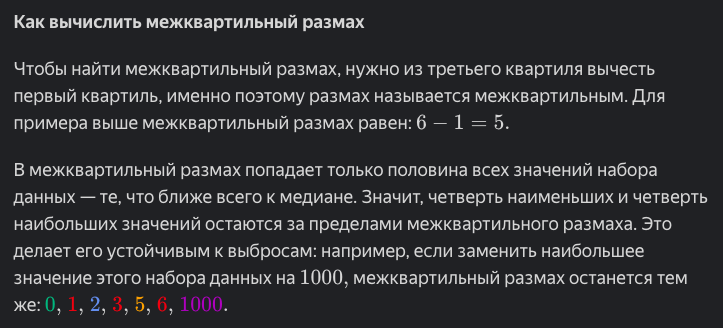

In [8]:
data_1 = pd.Series([17, 4, 4, 1, 7, 5, 8, 6, 15, 3])
data_1.describe()

count    10.000000
mean      7.000000
std       5.163978
min       1.000000
25%       4.000000
50%       5.500000
75%       7.750000
max      17.000000
dtype: float64

In [11]:
import pandas as pd
from scipy import stats # подключение модуля stats из библиотеки scipy

iqr_value = stats.iqr(data_1) # межквартильный размах
print(iqr_value)

3.75


Процентилем некоторого уровня (p-м процентилем) называют значение из набора данных, меньше которого ровно p % элементов всего набора данных.

квартили — это частные случаи процентиля. Поскольку первый квартиль — это значение, левее которого лежит ровно 
25 % всего набора данных, то первый квартиль также можно называть 25-м процентилем. Аналогично медиана — это 50-й процентиль, а третий квартиль — это 75-й процентиль.

Процентили нужны в случаях, когда нужно найти значение из набора данных, которое отделяет определённую часть всего набора. Например, если нужно найти «возраст сотрудников компании, меньше которого ровно 
**33 %** всех сотрудников». Именно такая универсальность и делает процентиль мощным инструментом в руках любого математика

In [12]:
import pandas as pd
import numpy as np

x = pd.Series([3, 1, 2, 5, 6, 0, 10])

data_percentile = np.percentile(x, 10) # 10-й процентиль
print(data_percentile)

0.6000000000000001


Проще говоря, чтобы вручную найти нужный процентиль (например, 33%) из имеющегося набора данных (без использования интерполяции):

- берем количество элементов - пусть их будет 100
- считаем что такое 33 процента - это значит 33 значения из 100 должны быть меньше некого значения процентиля
- сортируем по возрастанию, находим 33й элемент этого списка - собственно это и есть 33й процентиль

а вот в Python значение процентиля вычисляется приближённо, причём методы расчёта могут быть разными. По умолчанию в NumPy используется линейная интерполяция (method='linear')

    Различия при расчёте межквартильного размаха

Вернёмся к разным способам расчёта межквартильного размаха для набора данных 
3, 1, 2, 5, 6, 0, 10. Напомним: в одном случае мы выбирали значения квартилей из датасета, а во втором — использовали функцию stats.iqr().

Функция stats.iqr() считает межквартильный размах как разницу между 
75-м и 
25-м процентилями, рассчитанными с интерполяцией. Воспроизведём логику работы функции:

In [13]:
import pandas as pd
import numpy as np
from scipy import stats

x = pd.Series([3, 1, 2, 5, 6, 0, 10])
p25 = np.percentile(x, 25)
print('25-й процентиль с интерполяцией:', p25)
p75 = np.percentile(x,75)
print('75-й процентиль с интерполяцией:', p75)

difference = p75 - p25
print('Разница между 75-м и 25-м процентилями:', difference)

iqr_value = stats.iqr(x) # межквартильный размах
print('Межквартильный размах:', iqr_value)

25-й процентиль с интерполяцией: 1.5
75-й процентиль с интерполяцией: 5.5
Разница между 75-м и 25-м процентилями: 4.0
Межквартильный размах: 4.0


In [15]:
pd.Series([3, 1, 2, 5, 6, 0, 10]).describe()

count     7.000000
mean      3.857143
std       3.436499
min       0.000000
25%       1.500000
50%       3.000000
75%       5.500000
max      10.000000
dtype: float64

    Использовать интерполяцию или нет, вот в чём вопрос. 

Способ с интерполяцией считается более точным: без неё не учитывается, насколько далеко друг от друга находятся значения из датасета. Например, без интерполяции третий квартиль (или 
75
75-й процентиль) набора данных 
0,1,2,3,4,15,16 будет равен 
15, а с интерполяцией — 
9.5. <font color='red'>Интерполяция помогает лучше охарактеризовать данные.</font> 

Чем больше данных, тем меньше станут промежутки между отдельными значениями по сравнению с размахом набора данных. Также и относительная разница между процентилями, посчитанными с интерполяцией и без, станет не так ощутима.

#### Диаграмма размаха

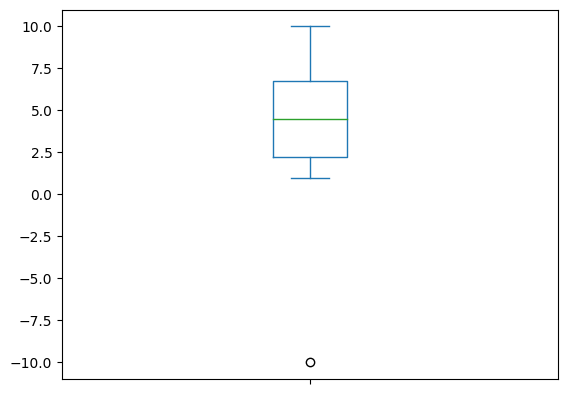

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

x = pd.Series([-10, 1, 2, 3, 4, 5, 6, 7, 8, 10]) # набор данных

ax = x.plot.box()
plt.show()

In [17]:
pd.Series([-10, 1, 2, 3, 4, 5, 6, 7, 8, 10]).describe()

count    10.000000
mean      3.600000
std       5.521674
min     -10.000000
25%       2.250000
50%       4.500000
75%       6.750000
max      10.000000
dtype: float64

In [18]:
# считаем межквартильный размах вручную
stats.iqr(pd.Series([-10, 1, 2, 3, 4, 5, 6, 7, 8, 10]))

4.5

это действительно значение между 25 и 75 процентилями

    «Усы» ограничиваются минимальным и максимальным значениями внутри интервала 
    [Q1 −1.5 межквартильного размаха; Q3 +1.5 межквартильного размаха]. 

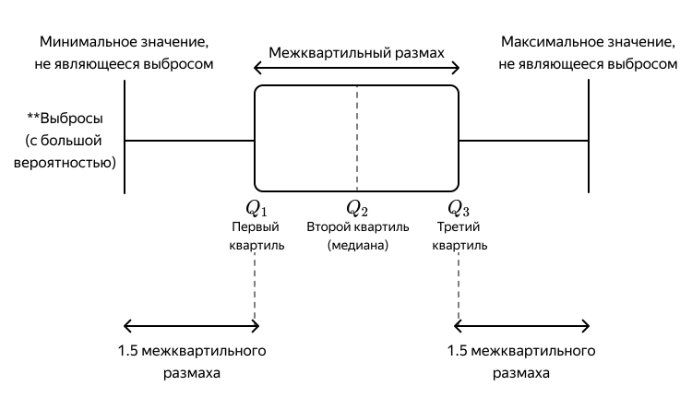

In [21]:
# считаем размер усов вручную
print(f'размер уса равен полтора межквартильного размаха = {4.5*1.5}')

print(f'нижняя граница усов = последняя базовая величина, которая не меньше {2.25 - 4.5*1.5}')

print(f'верхняя граница усов  = последняя базовая величина, которая не больше {6.75 + 4.5*1.5}')

размер уса равен полтора межквартильного размаха = 6.75
нижняя граница усов = последняя базовая величина, которая не меньше -4.5
верхняя граница усов  = последняя базовая величина, которая не больше 13.5


In [22]:
# смотрим что это за величины в наборе данных
pd.Series([-10, 1, 2, 3, 4, 5, 6, 7, 8, 10]).sort_values()

0   -10
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9    10
dtype: int64

значит нижняя граница усов - это 1, верхняя граница - это 10

проверим еще раз на графике

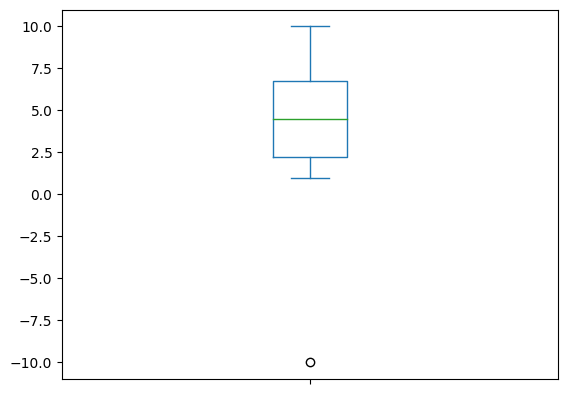

In [25]:
pd.Series([-10, 1, 2, 3, 4, 5, 6, 7, 8, 10]).plot.box()
plt.show()

все верно, а значение -10 это выброс

<AxesSubplot: >

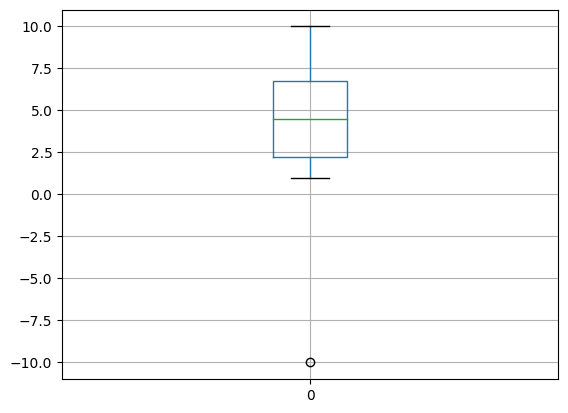

In [28]:
# еще способ построить boxplot 
pd.Series([-10, 1, 2, 3, 4, 5, 6, 7, 8, 10]).reset_index().boxplot(column=0)

#### Столбчатая диаграмма

Диаграмма размаха показывает, как расположены данные и их разброс, но она не всегда достаточно информативно описывает, как данные распределены между собой. 

Для представления на графике непрерывных величин часто используется гистограмма, но она не подходит для изображения дискретных величин. Если описывать их таким образом, могут возникнуть большие пустые интервалы на графиках. Так как дискретные величины могут принимать только определённое число значений, то для них придумали Столбчатую диаграмму, демонстрирующую частоту данных и то, как расположены данные между собой

    Таблица частот показывает, как часто каждый элемент встречается в полученном наборе данных.

In [29]:
import pandas as pd

data = pd.Series([1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 5]) # данные

print(data.value_counts())

3    4
1    3
4    2
2    1
5    1
dtype: int64


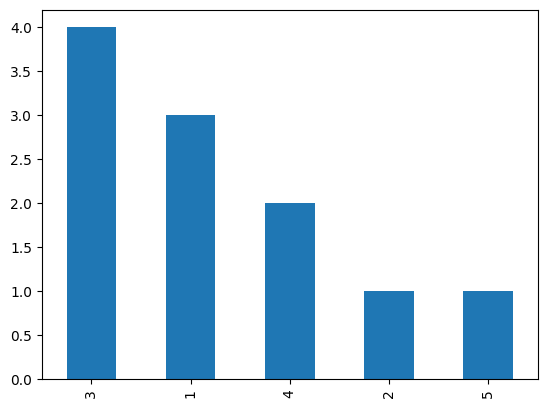

In [30]:
# на основе таблицы частот строим столбчатую диаграмму
import pandas as pd
import matplotlib.pyplot as plt

data = pd.Series([1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 5]) # данные
freqs = data.value_counts()

ax = freqs.plot.bar()
plt.show()

Столбчатая диаграмма хорошо отражает распределение  <font color='red'>дискретных</font> значений набора

        столбчатая диаграмма не подходит для отображения непрерывных величин. 

Но как тогда быть с непрерывными величинами? Для них можно построить <font color='red'>гистограмму </font>.

#### Гистограмма 

        Количество корзин при построении гистограммы очень важно: 

        Число корзин определяет точность, с которой мы хотим построить гистограмму. Если достаточно низкой точности и важнее показать самый популярный интервал, то следует использовать параметр bins с малым значением. Но если нужно тщательно проанализировать ситуацию, найти выбросы или малейшие отклонения частот друг от друга, стоит использовать параметр bins с большим значением. К сожалению, универсального ответа «что такое малое/большое значение» нет, и для каждого случая их придётся подбирать методом проб и ошибок.

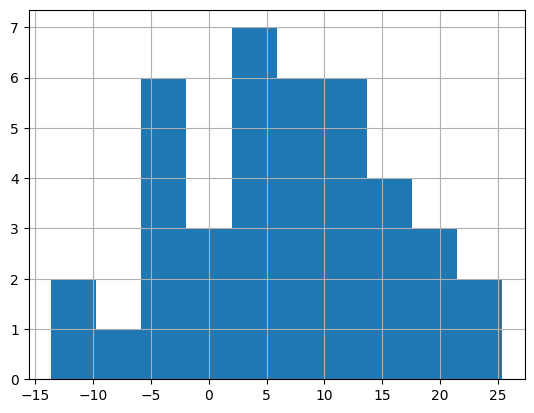

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

times = pd.Series([4.38, 19.27,   7.60,   9.65,   0.20,
   4.65,  -5.63, -13.64,  10.59,  12.90,
   6.88, 16.79,   4.54,   5.46, 5.72,
 -10.90, 2.79, -7.46, 14.90, 25.34,
   9.39, -5.72, -0.95, 14.31, 1.72,
   7.27,  18.62, 21.01, 5.66, 10.26,
  10.90,  7.64, 25.38, 10.36, -3.73,
  10.80, -5.53, 15.16, -2.95, -3.69]) # данные

times.hist()
plt.show()

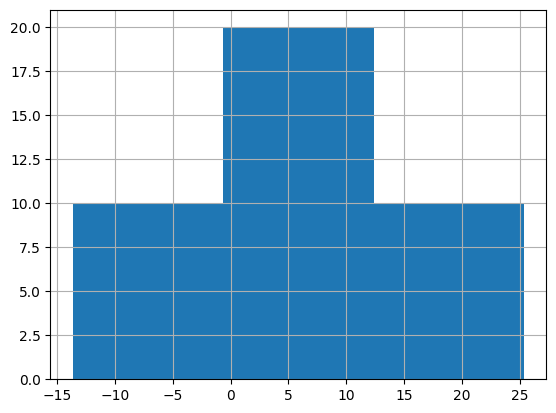

In [42]:
times.hist(bins=3)
plt.show()

Малое число корзин позволяет найти <font color='red'>наибольший интервал</font>  часто встречающихся значений

Большое число корзин позволяет определить <font color='green'>наиболее часто встречающееся значение</font>  и определить <font color='green'>выбросы</font> 

#### Плотность гистограммы 

особенность в том, что частоту, с которой значения попадают в интервал, показывают не высотой столбца, а площадью интервала. 

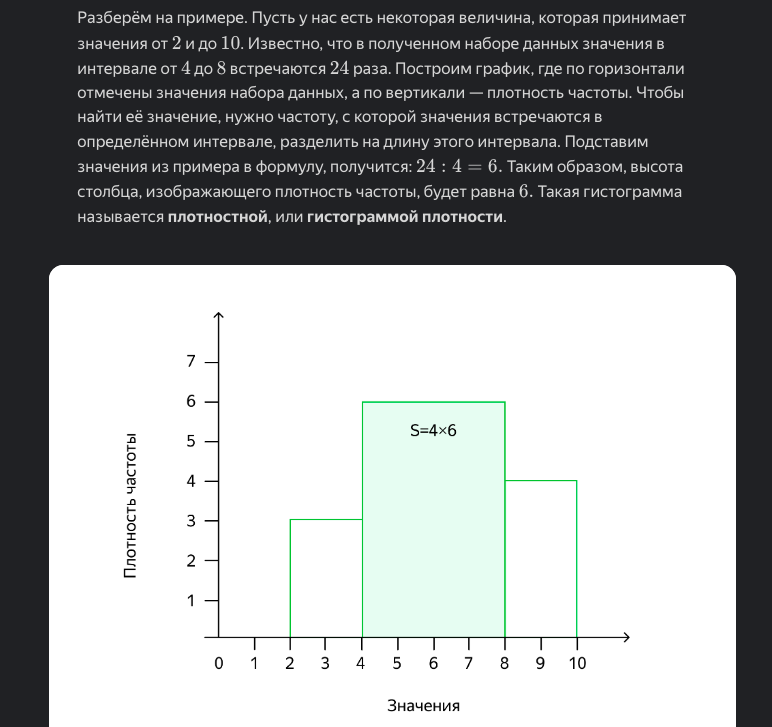

        Гистограмма плотностей — более удобный и универсальный инструмент в работе с непрерывными переменными, чем обычная гистограмма. У последней есть существенный недостаток: чем шире столбец, тем больше значений в него попадает, а значит, больше высота этого столбца.

По гистограмме плотностей можно оценить, сколько значений попало в любой интересующий нас интервал, не только тот, что выбран для построения графика. 

Для этого нужно взять два любых значения набора данных и <font color='red'>вычислить площадь частоты</font>, с которой значения попадают в этот интервал. Получившееся число и будет оценкой того, сколько значений попало в интервал.

Пример: известно время , которое каждый пользователь тратит на регистрацию на сайте

Строим график плотности частоты времени регистрации.

Сколько примерно пользователей тратит на регистрацию больше 18 минут?

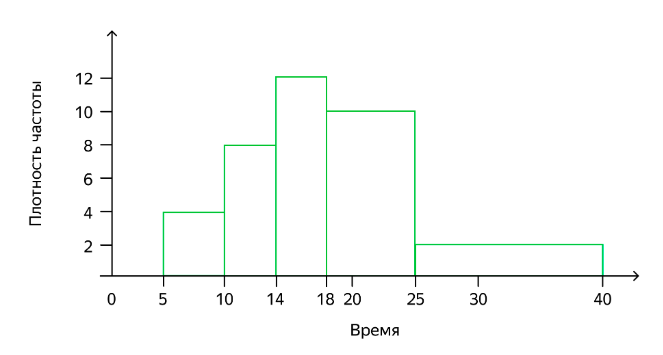

больше 18 минут - это два прямоугольника правее отметки 18. 

Считаем их площадь - (25-18)х 10 + (40- 25)х 2 = 100

### Случайные величины

         Случайная величина — переменная, которая хранит исход некоторого случайного эксперимента в виде числа. В результате эксперимента случайная величина может принимать только одно значение.

#### Таблица распределения случайной дискретной величины


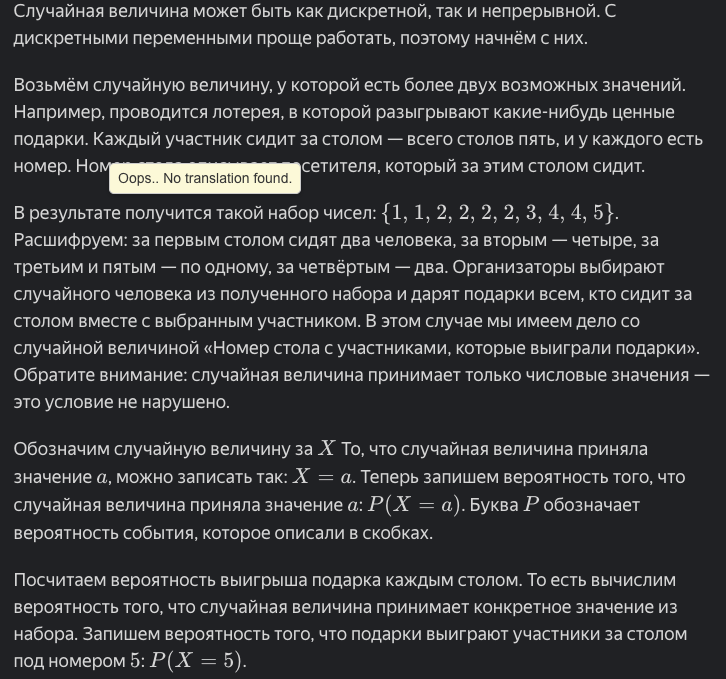

Таблица распределения вероятностей для каждого стола будет выглядеть так:

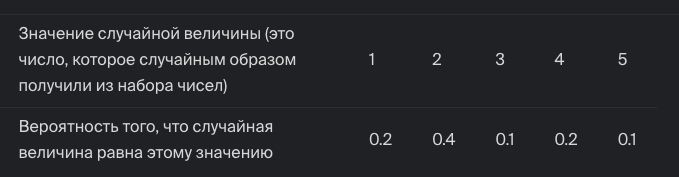

        Таблица распределения случайной дискретной величины — это таблица, которая хранит все значения, которые может принимать случайная величина, и вероятности, с которыми она эти значения принимает

        Чтобы вычислить вероятность того, что случайная величина примет значения из промежутка 
        [a, b], необходимо сложить все вероятности величин, которые может принимать случайная величина и которые лежат в промежутке 
        [a, b].

#### Кумулятивная функция

Кумулятивной функцией вероятности называется функция F(x), которая в каждой точке показывает вероятность того, что P(X⩽x).

На примере кафе график кумулятивной функции (накопительной) выглядит так: 

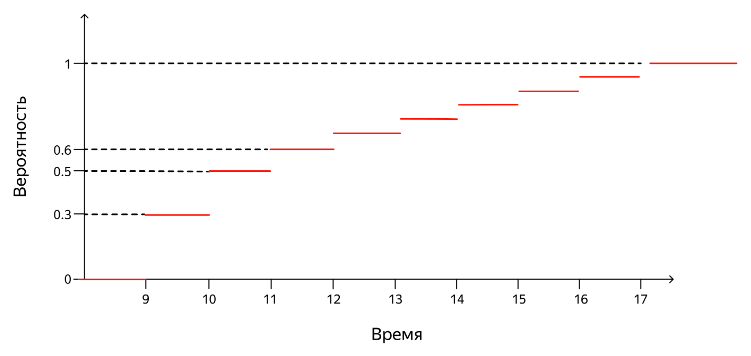

Вытекающие свойства:

- начинается из нуля (с нулевой вероятности)
- не может быть отрицательной
- не может быть убывающей (от значения к значений накопительный эффект)
- конечное значение - всегда единица (складывая или накапливая вероятности конечным значением всегда будет 1)

#### Математическое ожидание дискретной случайной величины

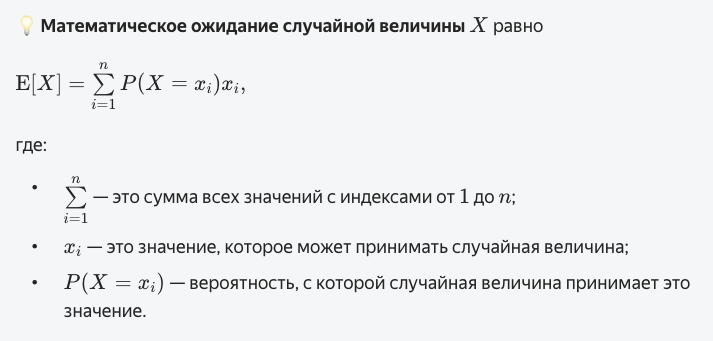

        Математическое ожидание — важная концепция в анализе случайных величин. Оно позволяет понять, к чему приближается среднее значение случайной величины в случае, если повторений будет бесконечно много

        закон больших чисел: для его выполнения нужно бесконечное количество повторений, поэтому среднее значение никогда не будет равно математическому ожиданию, а будет только приближаться к нему. Именно поэтому величина называется ожиданием: ожидают, что среднее будет ей равно, но проверить это на практике невозможно. 

Вернёмся в уже знакомое вам кафе. Чтобы применить формулу математического ожидания, конечно. Теперь мы будем анализировать не время прихода посетителя, а то, сколько посетителей и с какой вероятностью могут прийти за день. Так мы поможем поварам рассчитать, сколько булочек приготовить с утра для продажи в течение дня. 

Булочек не должно быть слишком много или слишком мало. 

Мы раздобыли таблицу распределения случайной величины 
X: «Число посетителей за день». Вот она:

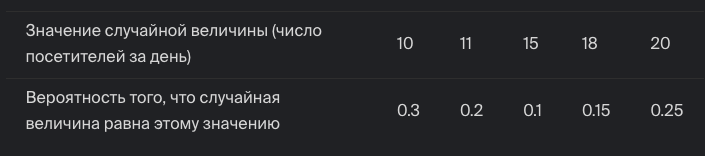

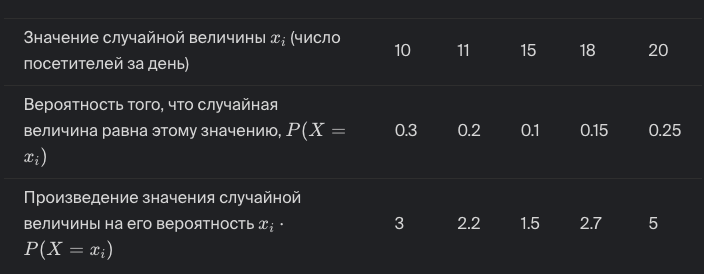

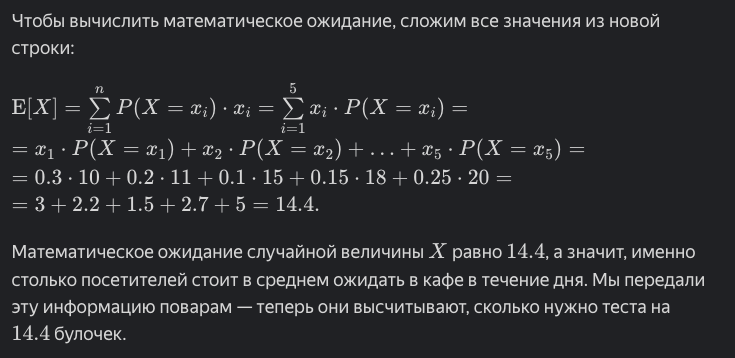

Итого, мат ожидание - это очень важная характеристика — она позволяет понять, какое значение можно в среднем ожидать от случайной величины. Поэтому математическое ожидание неплохо описывает, вокруг какого значения будут распределены остальные

#### Дисперсия дискретной случайной величины

По своей сути - это характеристика разброса случайной величины

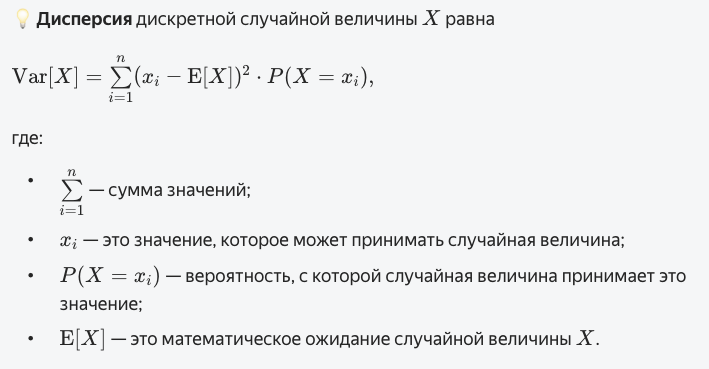

На примере того же кафе посчитаем дисперсию случайной величины

Учитывая, что мат ожидание равно 14.4 (см выше)

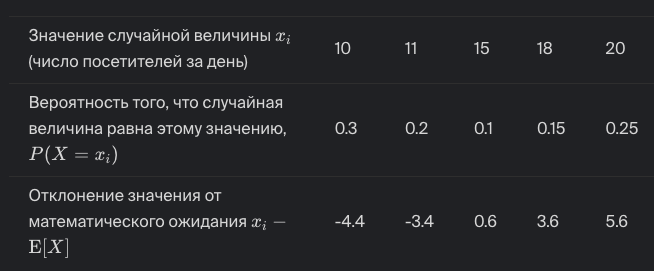

Возводим в квадрат все отлклонения:

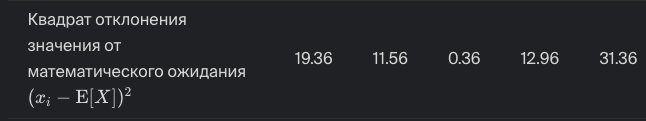

Добавим ещё одну строку, в которой вычислим произведение квадрата отклонения и вероятности этого значения 

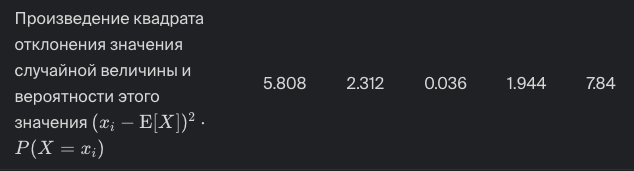

Тогда суммируя все значения, получаем, что дисперсия случайной величины равна 17.94 

Тогда стандартное отклонение равно корню из дисперсии = 4.24 

Тогда все значения из набора лежит в пределах +- 3 стандартных отклонения (97-99 % всех значений)

или иными словами, число посетителей нашего кафе за день наверняка будет лежать в промежутке:

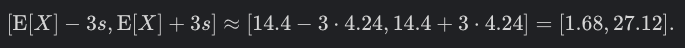

In [1]:
0.4*(195-100)**2 + 0.1*(195-150)**2 + 0.1*(195-200)**2 + 0.2*(195-250)**2+ 0.2*(195-350)**2

9225.0

Вторая формула для дисперсии:

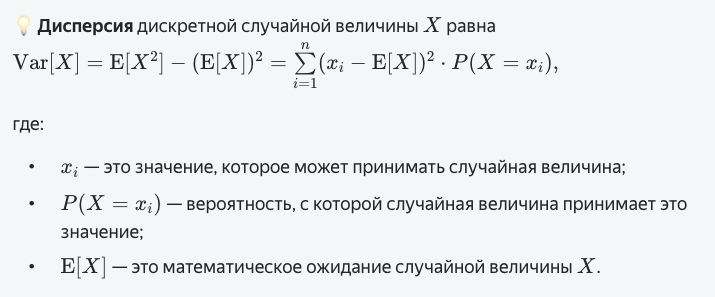

Расчет по второй формуле будет выглядеть так:

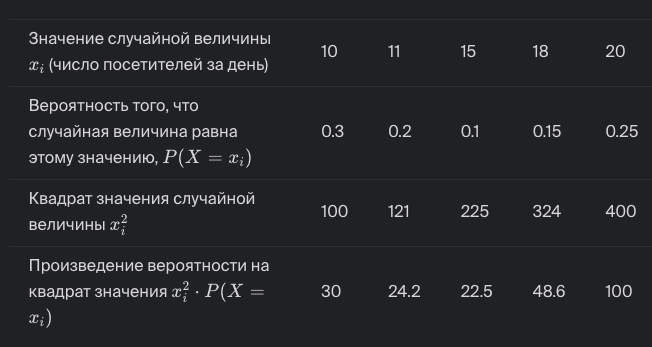

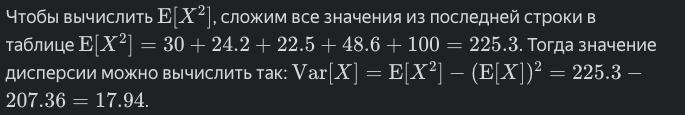

Ответ совпадает с ранее посчитанным

Это возможно по причине того, что эти вероятности равны:

- вероятность того, что квадрат случайной величины X окажется равен одному из значений этой случайной величины в квадрате;

- вероятность того, что случайная величина X примет это значение.


#### Свойства дисперсии случайной величины
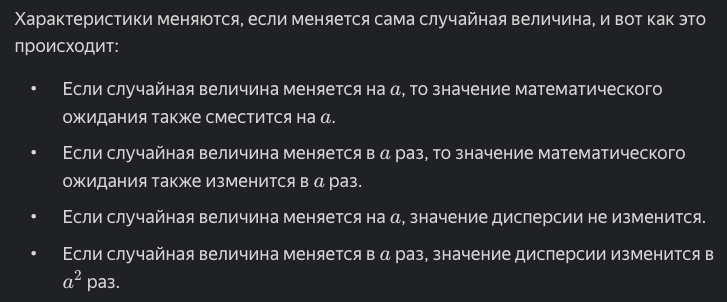


Пример: чему равна дисперсия?

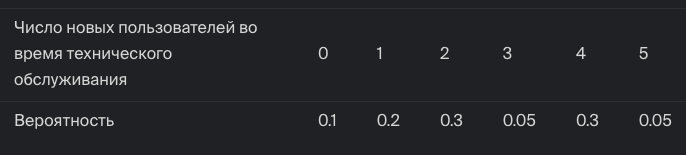

мат ожидание = 2.4 

мат ожидание от квадрата значений  = 0+ 0.2 + 1.2 + 0.45 +4.8 + 1.25 = 7.9

тогда дисперсия равна 7.9 - 2.4**2 = 2.14

### Распределения 

#### Эксперимент Бернулли

    Испытание с двумя исходами называют экспериментом (испытанием) Бернулли

Распределение с двумя исходами часто называют схемой Бернулли

#### Биноминальный эксперимент


https://practicum.yandex.ru/trainer/data-scientist/lesson/c274d442-fec9-40f4-a90b-ec6fe2d1d528/

        Биномиальный эксперимент — это эксперимент, в котором подряд проводят несколько одинаковых и независимых друг от друга испытаний Бернулли. Под независимостью понимают то же, что и в теории вероятностей: исход одного эксперимента не влияет на вероятности исходов другого. 

#### Распределение вероятностей биномиального эксперимента с двумя испытаниями по схеме Бернулли

В задачах с биномиальным экспериментом определяют случайную величину «количество успехов» и строят для неё распределение вероятностей.

Например, в задаче о злых и добрых питонах случайная величина «количество злых питонов из двух выбранных случайно» принимает значения 0,1,2. 

Чтобы построить её распределение вероятностей, нужно:

- зафиксировать значение случайной величины;
- определить количество исходов, которые приводят к такому значению случайной величины;
- рассчитать вероятность одного исхода с нужным количеством успехов;
- домножить значение из п.2 на вероятность из п.3.

Тогда при условии, что вероятность для питона быть добрым = 0.9 , таблица распределения двух злых питонов будет выглядеть так

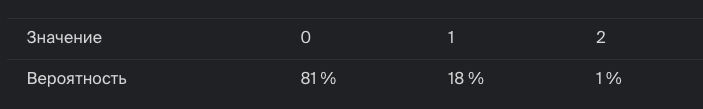

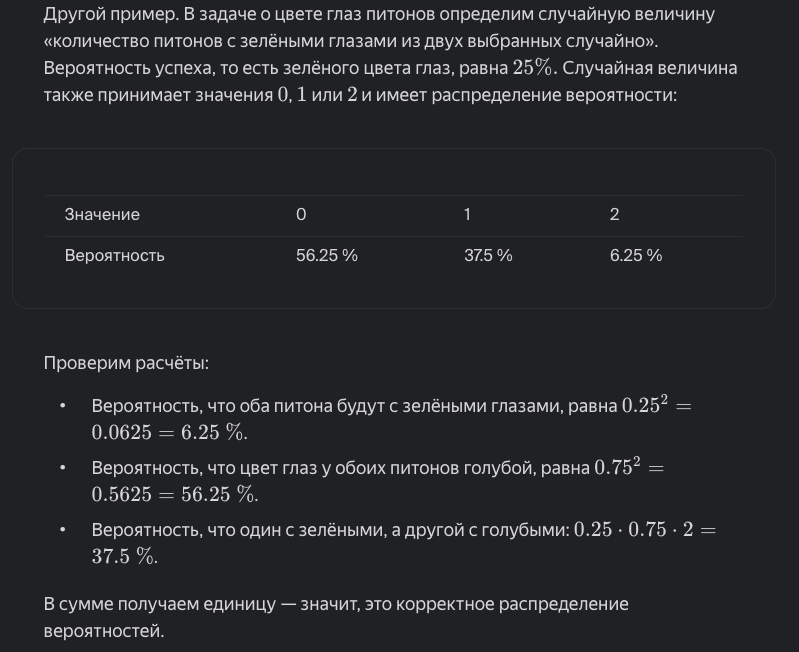

#### Биноминальное распределение 

https://practicum.yandex.ru/trainer/data-scientist/lesson/78e8582b-448b-485e-b6f2-a7f9b683bcbe/

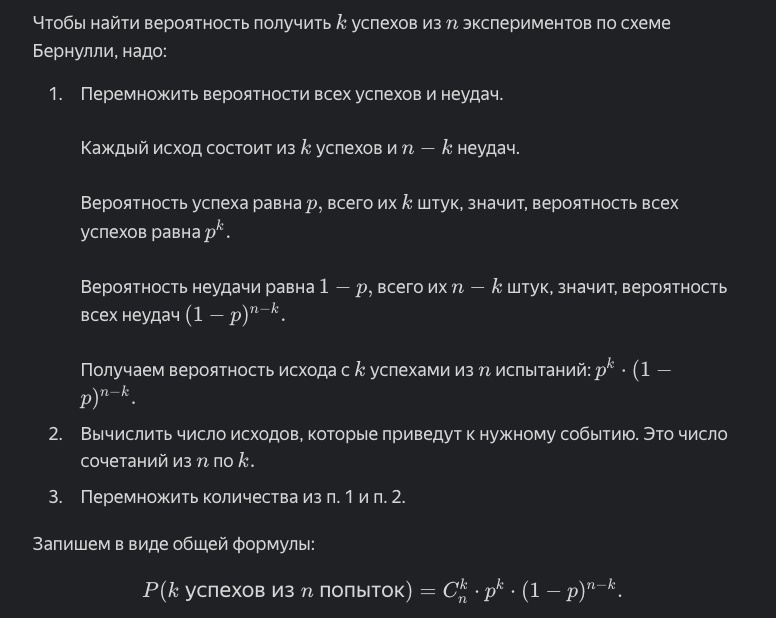

где количество сочетаний считается по формуле

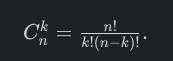

Плюс указаны вероятность успеха и вероястность неудачи

        Пример:

        Магазин отправляет VIP-клиентам письмо со специальным предложением. Каждое отправленное письмо — испытание с двумя исходами:
        клиент открыл письмо — успех;
        клиент не открыл письмо — неудача.

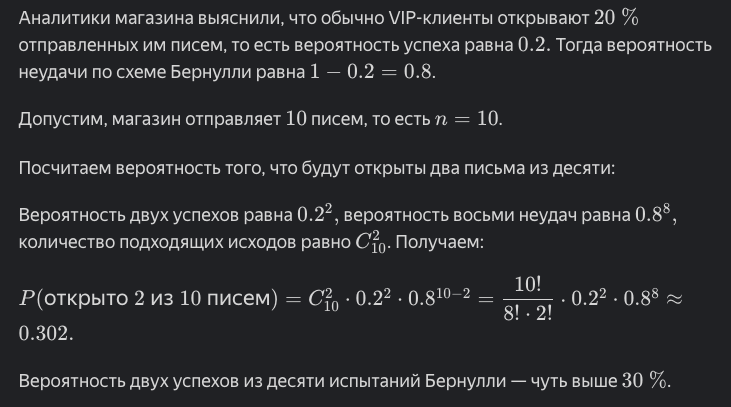

Биномиальное распределение

Часто исследователей интересует вероятность не конкретного числа успехов, а интервала. Например, какова вероятность, что:

- Из десяти писем откроют больше шести?
- В партии из ста лампочек будет меньше двух бракованных?
- Из семи питонов добрыми окажутся от двух до пяти?

Чтобы ответить на эти вопросы, нужно построить распределение, то есть найти вероятности для любого возможного количества успехов.

Случайная величина распределена биномиально, если:

- Проводится фиксированное число попыток n.

- Каждая попытка — простой эксперимент Бернулли ровно с двумя исходами.

- Вероятность успеха p одинакова для всех n попыток.

- Попытки независимы между собой.

В общем виде распределение случайной величины успехов выглядит таким образом:

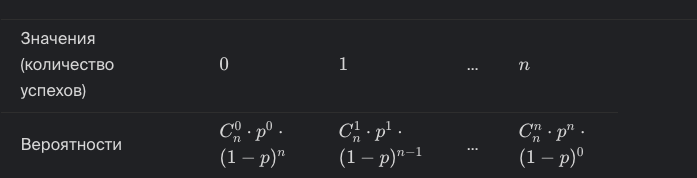

Зная вероятности всех значений, можно рассчитать математическое ожидание и дисперсию для распределения. 

Для биномиального распределения формулы получаются короткими: мат.ожидание равно **n⋅p**, а дисперсия **n⋅p⋅(1−p)**. 

По мат.ожиданию легко судить каким будет самое вероятное значение — это самое близкое к **n⋅p** число. Это видно и на графиках.

Теперь посмотрим на само распределение. Допустим, вероятность успеха и неудачи одинакова и равна 0.5 

<BarContainer object of 26 artists>

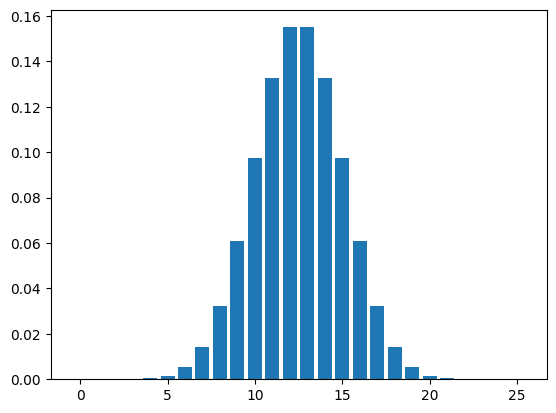

In [7]:
from matplotlib import pyplot as plt
from math import factorial

n = 25 # количество попыток
p = 0.5 # вероятность успеха

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)

Распределение получается симметричным. 

Но что, если вероятность успеха больше/меньше вероятности успеха?

<BarContainer object of 31 artists>

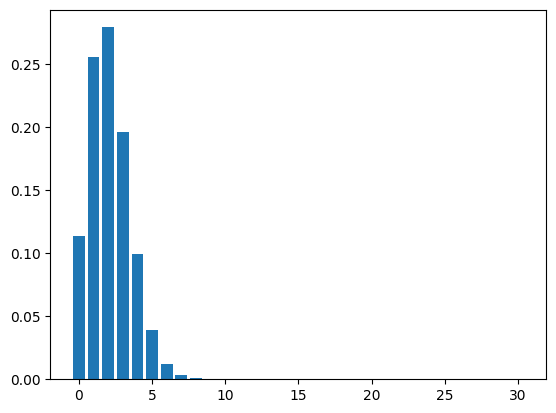

In [8]:
# пусть вероятность успеха сильно меньше неудачи - тогда график будет скошен влево

from matplotlib import pyplot as plt
from math import factorial

n = 30 # количество попыток
p = 0.07 # вероятность успеха

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)

График показывает, что при вероятности успеха p, равной 7 %, и 30 попытках вероятность, что случится больше 8 успехов, крайне мала. 

<BarContainer object of 31 artists>

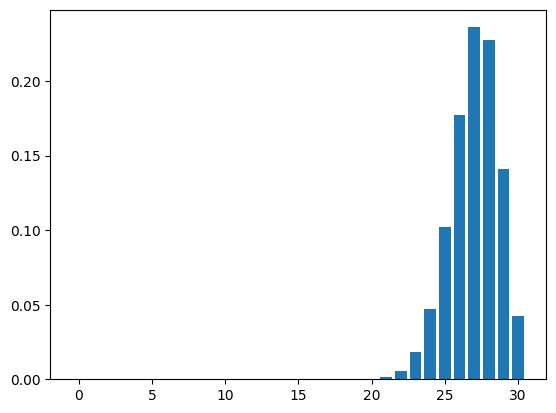

In [10]:
# и наоборот: пусть вероятность успеха сильно больше неудачи - тогда график будет скошен вправо

from matplotlib import pyplot as plt
from math import factorial

n = 30 # количество попыток
p = 0.9 # вероятность успеха

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)

Кстати, сократить код можно с помощью binom.pmf (probability mass function — функция для дискретных распределений, которая показывает вероятность каждого значения.)

<BarContainer object of 27 artists>

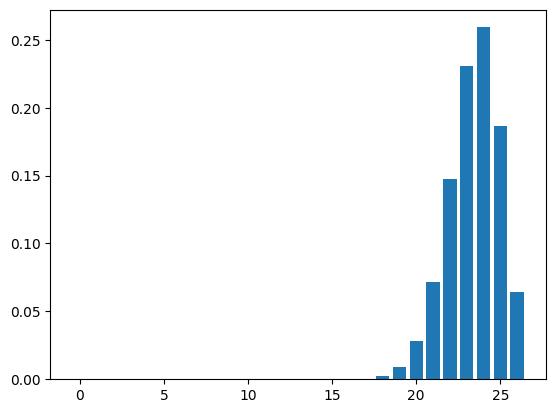

In [11]:
from matplotlib import pyplot as plt
from scipy.stats import binom

n = 26 # количество попыток
p = 0.9 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr)

Пример - как читать такие графики

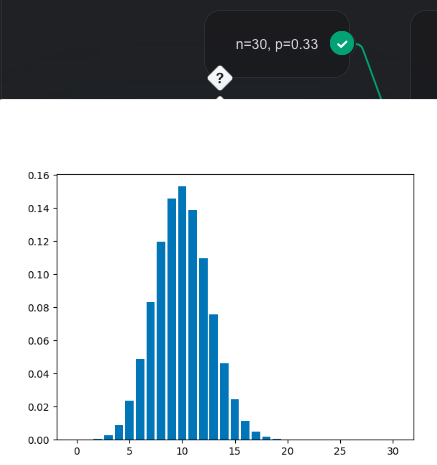

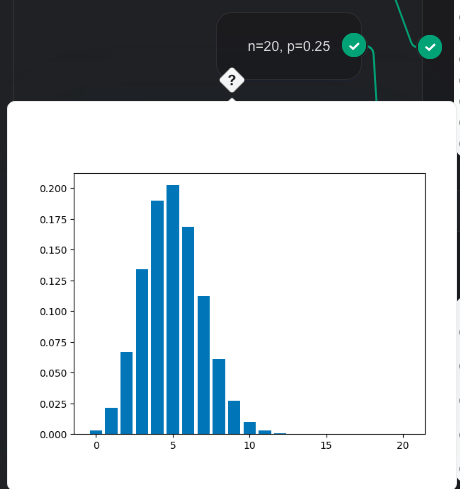

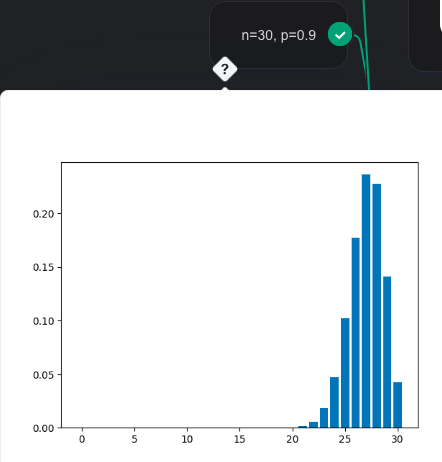

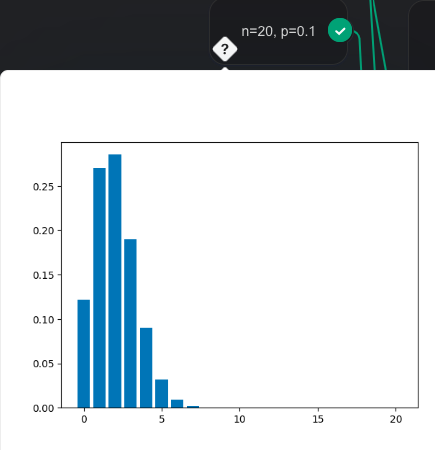

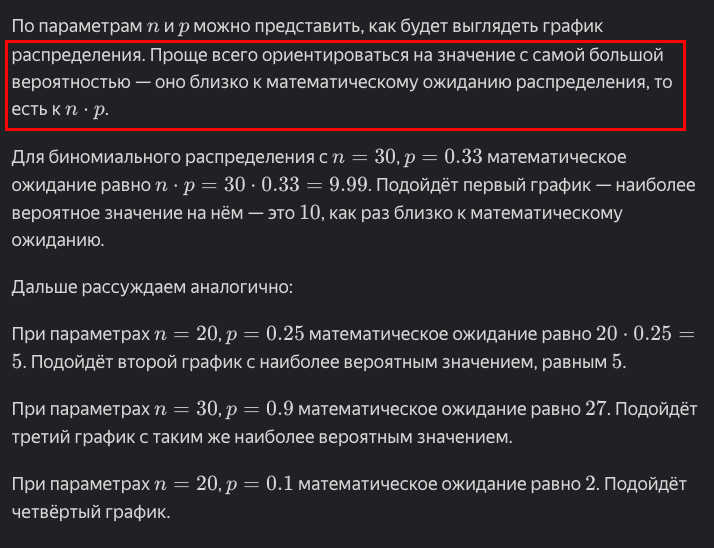

Пример:

<BarContainer object of 31 artists>

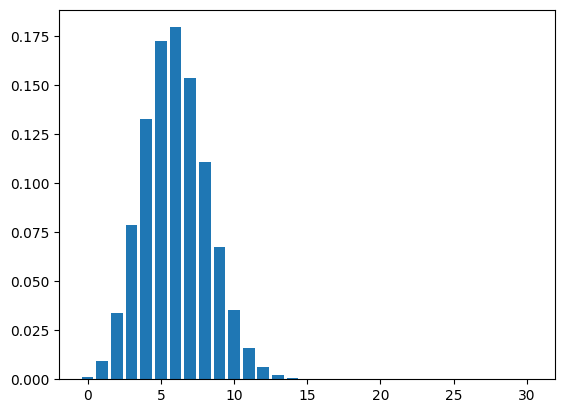

In [12]:
from matplotlib import pyplot as plt
from math import factorial
from scipy.stats import binom

p = 0.2
n = 30

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr)

Если начать переговоры с 
30 медиа, то 6 — наиболее вероятный результат. Однако слишком велика вероятность, что успехов будет меньше. 

На гистограмме видно, что в диапазоне от 
0 до 
5 успехов примерно половина всего распределения. Риск неприемлемо велик.